In [2]:
with open("../datos_filtrados.txt", 'r') as archivo:
    lineas = archivo.readlines()

t_values = []
a_values = []
v_values = []
d_values = []
for linea in lineas:
    data_values = linea.strip().split(';')
    if len(data_values) == 4:
        t_values.append(int(data_values[0][1:]))
        
        a_value = int(data_values[1][1:]) if data_values[1][0] == 'A' else int(data_values[1][1:])
        a_values.append(a_value)

        v_value = int(data_values[2][1:].split(' ')[0]) if data_values[2][0].isdigit() else int(data_values[2][1:])
        v_values.append(v_value)

        d_values.append(int(data_values[3][1:]))

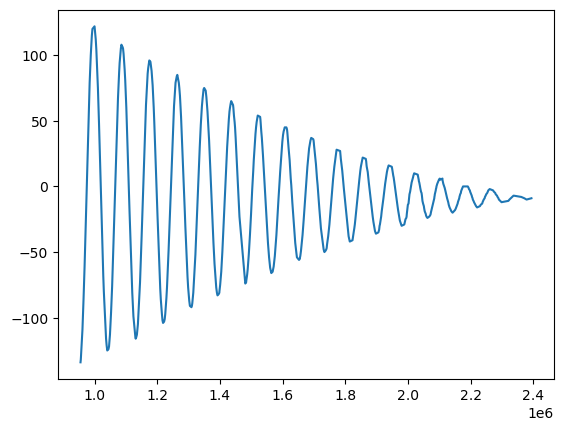

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(t_values[116:],a_values[116:])

-135


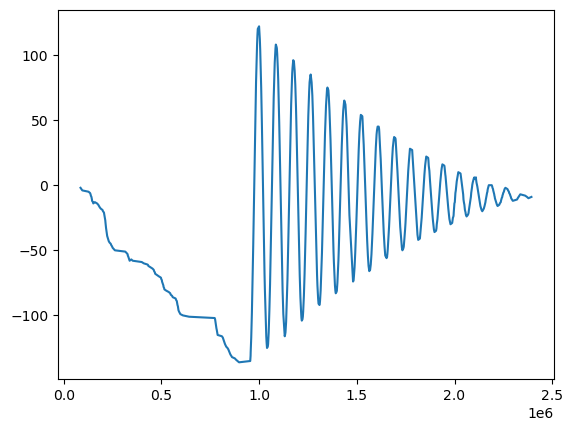

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(t_values,a_values)
print(a_values[115])

In [45]:
from scipy.optimize import curve_fit

import numpy as np

guess = [5,5]

def model1(t,alpha,omega):
    return (-134 - alpha*t)*np.cos(omega*t)

a = np.array(a_values[116:])
t = np.array(t_values[116:])
t = t-t[0]
iterations = 300

params,covariance = curve_fit(model1,t,a,guess)

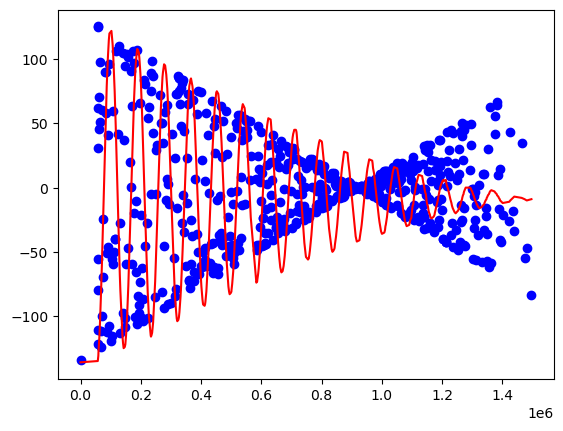

In [46]:
fig,ax = plt.subplots()

ax.plot(t,model1(np.array(t),params[0],params[1]),'bo')
ax.plot(t,a,'r')